### 변수선택법을 통한 다중회귀분석

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
os.getcwd()

'C:\\Users\\jinguk\\OneDrive - 충북대학교\\python practice\\python part06 regression'

In [4]:
# 데이터 불러오기
corolla = pd.read_csv('C:\\Users\\jinguk\\OneDrive - 충북대학교\\python practice\\python part06 regression\\ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


### 범주형 변수를 이진형 변수로 변환

In [16]:
# 가변수 생성
corolla.Fuel_Type.unique()
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [19]:
print(dummy_d, dummy_c, dummy_p)

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [21]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [22]:
dummy_p[p_idx] = 1  # True 값이 있는 더미 데이터에 1을 대입
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

### 불필요한 변수 제거 및 가변수 추가

In [24]:
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

In [27]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


### 이제 상수항을 추가하고 회귀분석 적용

In [28]:
# bias 추가
mlr_data2 = sm.add_constant(mlr_data, has_constant = 'add') # 새 변수에 저장하는 것이 편함.
                                                            #실행할 때마다 상수항이 추가되므로
                                                            #기존 변수에 사용하면 번거로울 수 있다.
mlr_data2.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [31]:
feature_columns = list(mlr_data2.columns.difference(['Price'])) # price 변수만을 제외하고 가져옴

X = mlr_data2[feature_columns]
y = mlr_data2.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [32]:
# Train the MLS/ 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [33]:
# R square가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     286.7
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:16:25   Log-Likelihood:                -8473.6
No. Observations:                1005   AIC:                         1.702e+04
Df Residuals:                     971   BIC:                         1.718e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -288.6865    136.016     -2.122      0.034    -555.607     -21.766
Age_08_04         -121.1671      4.213    -28.760      0.000    -129.435    -112.899
Airbag_1           203.5987    264.019      0.771      0.441    -314.516     721.713
Airbag_2          -103.8983    139.247     -0.746      0.456    -377.159     169.362
Airco              221.6497     95.906      2.311      0.021      33.442     409.857
Automatic          411.5400    160.734      2.560      0.011      96.114     726.967
Automatic_airco   2567.5014    209.228     12.271      0.000    2156.909    2978.093
BOVAG_Guarantee    412.8204    135.395      3.049      0.002     147.120     678.521
Backseat_Divider  -283.5176    135.905     -2.086      0.037    -550.219     -16.816
Boardcomputer     -233.3808    130.119     -1.794      0.073    -488.727      21.965
CD_Player          197.6485    108.481      1.822      0.069     -15.235     410.532
CNG               -951.6692    212.993     -4.468      0.000   -1369.648    -533.690
Central_Lock      -165.7348    155.583     -1.065      0.287    -471.052     139.583
Cylinders           -0.0341      0.002    -14.467      0.000      -0.039      -0.029
Diesel             230.8898    184.514      1.251      0.211    -131.203     592.982
Doors               59.9929     43.192      1.389      0.165     -24.767     144.753
Gears              394.8606    224.403      1.760      0.079     -45.510     835.231
Guarantee_Period    61.7359     14.110      4.375      0.000      34.046      89.426
HP                  20.2031      3.717      5.436      0.000      12.909      27.497
KM                  -0.0166      0.001    -12.246      0.000      -0.019      -0.014
Met_Color          -51.3517     82.907     -0.619      0.536    -214.049     111.346
Metallic_Rim       203.6745    102.694      1.983      0.048       2.146     405.203
Mfg_Month         -100.0122     11.067     -9.037      0.000    -121.730     -78.294
Mfg_Year             1.3610      0.875      1.556      0.120      -0.355       3.077
Mfr_Guarantee      172.5344     80.283      2.149      0.032      14.986     330.083
Mistlamps          -57.7406    117.446     -0.492      0.623    -288.217     172.736
Petrol             720.7708    191.547      3.763      0.000     344.877    1096.664
Power_Steering     -67.9900    303.229     -0.224      0.823    -663.050     527.070
Powered_Windows    562.9837    156.518      3.597      0.000     255.831     870.136
Quarterly_Tax       11.0492      1.904      5.804      0.000       7.313      14.785
Radio               70.3353   1149.498      0.061      0.951   -2185.452    2326.123
Radio_cassette    -154.7842   1147.888     -0.135      0.893   -2407.411    2097.842
Sport_Model        296.8293     95.484      3.109      0.002     109.451     484.208
Tow_Bar           -174.

### VIF 를 통한 다중공산성 확인

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mlr_data2.values, i) for i in range(mlr_data2.shape[1])]
vif['features'] = mlr_data2.columns
vif

,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


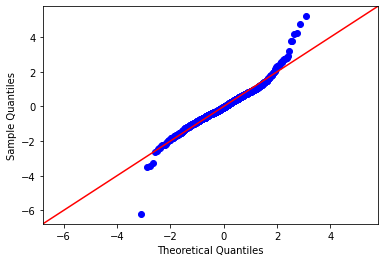

In [40]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot : 잔차의 정규성 검정
fig = sm.qqplot(res, fit = True, line = '45')

Text(0, 0.5, 'Residual')

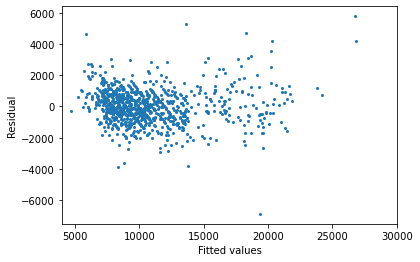

In [41]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [47]:
# 검증데이터에 대한 예측
pred_y2 = fitted_full_model.predict(test_x)

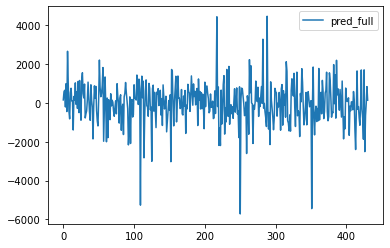

In [48]:
# 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
# MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1184794.4257331267

 ### 변수선택법

In [54]:
def processSubset(X, y, feature_set):   # X 와 y, feature_set을 받아 회귀 모델과 AIC를 return
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model': regr, 'AIC': AIC}

print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFAA9E50>, 'AIC': 19047.423057134787}


In [55]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장. k는 변수의 수
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const']) # 상수항을 제거하고 모든 변수의 조합을 비교하고 다시 상수항 추가
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.8772406578063965 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17504.9
Name: 211, dtype: object


In [56]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [57]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.05298304557800293 seconds.
Processed  630 models on 2 predictors in 1.0094976425170898 seconds.
Processed  7140 models on 3 predictors in 10.070221424102783 seconds.
Total elapsed time: 11.361629724502563 seconds.


In [58]:
models

,AIC,model
1,17761.883528,<statsmodels.regression.linear_model.Regressio...
2,17504.882544,<statsmodels.regression.linear_model.Regressio...
3,17380.354316,<statsmodels.regression.linear_model.Regressio...


In [59]:
models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2014.
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:47:37   Log-Likelihood:                -8686.2
No. Observations:                1005   AIC:                         1.738e+04
Df Residuals:                    1001   BIC:                         1.740e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0219      0.001    -15.810      0.000      -0.025      -0.019
Mfg_Year    1538.5488     38.135     40.345      0.000    1463.715    1613.383
Weight        17.6241      0.940     18.741      0.000      15.779      19.469
const      -3.083e+06   7.58e+04    -40.685      0.000   -3.23e+06   -2.93e+06
==============================================================================
Omnibus:                      144.384   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.526
Skew:                          -0.206   Prob(JB):                         0.00
Kurtosis:                       9.140   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90692
full model AIC:  17015.21133
full model MSE:  13260106.83180
selected model Rsquared:  0.85790
selected model AIC:  17380.35432
selected model MSE:  13260106.83180


Text(0, 0.5, 'BIC')

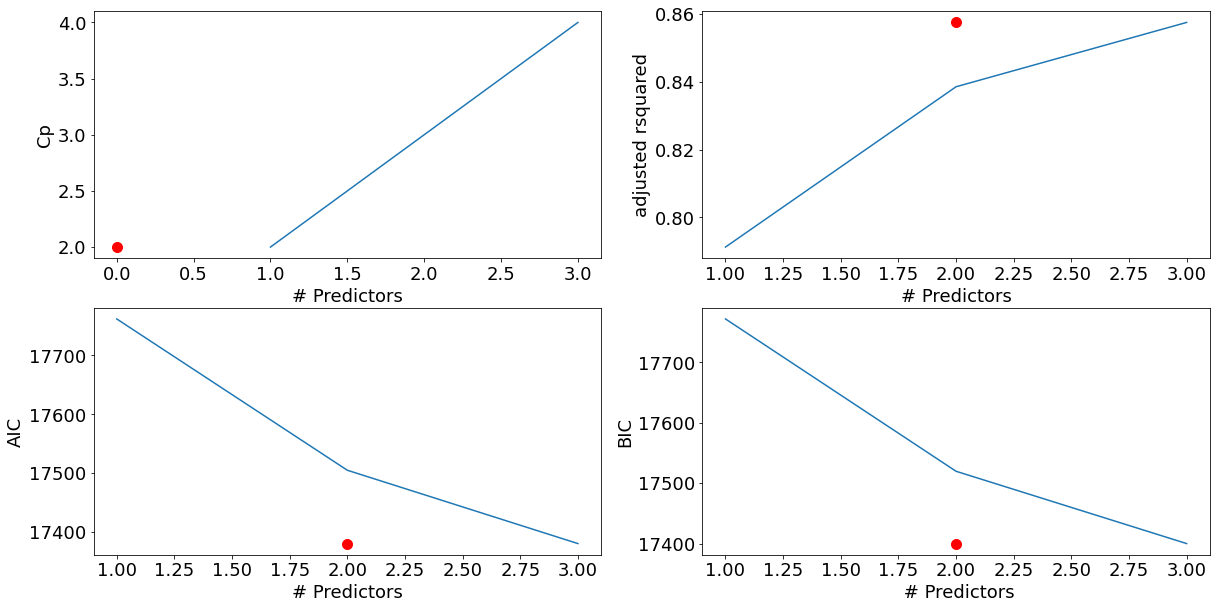

In [62]:
# 변수의 수를 증가시켜가며 성능 지표를 시각화 하는 코드
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

### 전진선택법

In [63]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [64]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [65]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.04598546028137207
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EB3F1F070>
Processed  35 models on 2 predictors in 0.05098319053649902
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EB3F1F460>
Processed  34 models on 3 predictors in 0.05997967720031738
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EB3F290D0>
Processed  33 models on 4 predictors in 0.037987709045410156
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EB3EFABE0>
Processed  32 models on 5 predictors in 0.037987470626831055
Selected predictors: ['Mfg_Year', 'Automatic_airco'

In [66]:
Forward_best_model.aic

17002.12845312552

In [67]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     430.7
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:55:49   Log-Likelihood:                -8478.1
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     982   BIC:                         1.712e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year             2.1106      0.640      3.297      0.001       0.854       3.367
Automatic_airco   2511.5243    195.375     12.855      0.000    2128.123    2894.926
Weight               9.7819      1.172      8.344      0.000       7.481      12.082
KM                  -0.0163      0.001    -12.166      0.000      -0.019      -0.014
Powered_Windows    425.1020     89.580      4.745      0.000     249.311     600.893
HP                  19.9204      3.585      5.556      0.000      12.885      26.956
Quarterly_Tax       11.2349      1.835      6.122      0.000       7.634      14.836
Guarantee_Period    62.9140     13.843      4.545      0.000      35.749      90.079
Petrol             805.9556    183.431      4.394      0.000     445.994    1165.918
BOVAG_Guarantee    447.9762    131.240      3.413      0.001     190.433     705.519
Diesel             175.4847    177.425      0.989      0.323    -172.691     523.661
Sport_Model        314.5499     90.869      3.462      0.001     136.230     492.870
ABS               -325.6521    106.207     -3.066      0.002    -534.070    -117.234
Airco              207.6145     92.359      2.248      0.025      26.370     388.859
Backseat_Divider  -321.5871    123.093     -2.613      0.009    -563.142     -80.032
Metallic_Rim       213.2061     95.331      2.236      0.026      26.131     400.282
Automatic          336.8336    157.600      2.137      0.033      27.562     646.106
Mfr_Guarantee      157.0287     78.770      1.994      0.046       2.453     311.605
Tow_Bar           -180.0955     84.787     -2.124      0.034    -346.480     -13.711
Mfg_Month         -100.7394     10.966     -9.187      0.000    -122.259     -79.220
Boardcomputer     -232.2808    127.693     -1.819      0.069    -482.864      18.302
CD_Player          179.2364    103.082      1.739      0.082     -23.050     381.523
Age_08_04         -121.0644      4.061    -29.810      0.000    -129.034    -113.095
CNG               -981.4485    208.815     -4.700      0.000   -1391.223    -571.674
Cylinders           -0.0327      0.002    -15.821      0.000      -0.037      -0.029
const               -0.0082      0.001    -15.821      0.000      -0.009      -0.007
==============================================================================
Omnibus:                       98.393   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.947
Skew:                           0.258   Prob(JB):                    4.58e-114
Kurtosis:                       6.493   Cond. No.                     6.18e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-27. Thi

### 후진소거법

In [68]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [69]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [70]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.11894655227661133
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFD204F0>
Processed  35 models on 34 predictors in 0.11096620559692383
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metal

In [71]:
Backward_best_model.aic

17002.12845312548

In [72]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     430.7
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:59:21   Log-Likelihood:                -8478.1
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     982   BIC:                         1.712e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -325.6521    106.207     -3.066      0.002    -534.070    -117.234
Airco              207.6145     92.359      2.248      0.025      26.370     388.859
Automatic          336.8336    157.600      2.137      0.033      27.562     646.106
Automatic_airco   2511.5243    195.375     12.855      0.000    2128.123    2894.926
BOVAG_Guarantee    447.9762    131.240      3.413      0.001     190.433     705.519
Backseat_Divider  -321.5871    123.093     -2.613      0.009    -563.142     -80.032
Boardcomputer     -232.2808    127.693     -1.819      0.069    -482.864      18.302
CD_Player          179.2364    103.082      1.739      0.082     -23.050     381.523
CNG              -1156.9332    341.350     -3.389      0.001   -1826.792    -487.074
Cylinders        -6.852e+05    2.3e+04    -29.810      0.000    -7.3e+05    -6.4e+05
Guarantee_Period    62.9140     13.843      4.545      0.000      35.749      90.079
HP                  19.9204      3.585      5.556      0.000      12.885      26.956
KM                  -0.0163      0.001    -12.166      0.000      -0.019      -0.014
Metallic_Rim       213.2061     95.331      2.236      0.026      26.131     400.282
Mfg_Month           20.3250     10.931      1.859      0.063      -1.126      41.776
Mfg_Year          1454.8832     49.014     29.683      0.000    1358.698    1551.068
Mfr_Guarantee      157.0287     78.770      1.994      0.046       2.453     311.605
Petrol             630.4709    294.363      2.142      0.032      52.818    1208.124
Powered_Windows    425.1020     89.580      4.745      0.000     249.311     600.893
Quarterly_Tax       11.2349      1.835      6.122      0.000       7.634      14.836
Sport_Model        314.5499     90.869      3.462      0.001     136.230     492.870
Tow_Bar           -180.0955     84.787     -2.124      0.034    -346.480     -13.711
Weight               9.7819      1.172      8.344      0.000       7.481      12.082
const            -1.713e+05   5746.669    -29.810      0.000   -1.83e+05    -1.6e+05
==============================================================================
Omnibus:                       98.393   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.947
Skew:                           0.258   Prob(JB):                    4.58e-114
Kurtosis:                       6.493   Cond. No.                     1.21e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 단계적 선택법
- 전위 후위 방법을 번갈아 가며 사용

In [73]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [74]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.04398536682128906
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE8D070>
forward
Processed  1 models on 0 predictors in 0.002000093460083008
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE8DD90>
Processed  35 models on 2 predictors in 0.04849076271057129
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE83E50>
forward
Processed  2 models on 1 predictors in 0.0029990673065185547
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFF9288E0>
Processed  34 models on 3 predictors in 0.047985076904296875
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_mo

Processed  21 models on 16 predictors in 0.04798412322998047
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Diesel', 'Sport_Model', 'ABS', 'Airco', 'Backseat_Divider', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE88C70>
forward
Processed  16 models on 15 predictors in 0.036988019943237305
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Diesel', 'Sport_Model', 'ABS', 'Airco', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE88E50>
Processed  20 models on 17 predictors in 0.04698586463928223
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petr

Processed  24 models on 23 predictors in 0.0584869384765625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Diesel', 'Sport_Model', 'ABS', 'Airco', 'Backseat_Divider', 'Metallic_Rim', 'Automatic', 'Mfr_Guarantee', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Age_08_04', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE8D5B0>
backward
Processed  13 models on 24 predictors in 0.03198862075805664
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Diesel', 'Sport_Model', 'ABS', 'Airco', 'Backseat_Divider', 'Metallic_Rim', 'Automatic', 'Mfr_Guarantee', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Age_08_04', 'CNG', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000

Processed  24 models on 23 predictors in 0.06496143341064453
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Diesel', 'Sport_Model', 'ABS', 'Airco', 'Backseat_Divider', 'Metallic_Rim', 'Automatic', 'Mfr_Guarantee', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Age_08_04', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020EFFE83460>
backward
Processed  13 models on 24 predictors in 0.027991294860839844
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'Powered_Windows', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Diesel', 'Sport_Model', 'ABS', 'Airco', 'Backseat_Divider', 'Metallic_Rim', 'Automatic', 'Mfr_Guarantee', 'Tow_Bar', 'Boardcomputer', 'CD_Player', 'Age_08_04', 'CNG', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000

In [75]:
Stepwise_best_model.aic

17002.128453125497

### 성능평가

In [76]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (24,) (24,)


In [77]:
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'Weight',
 'KM',
 'Powered_Windows',
 'HP',
 'Quarterly_Tax',
 'Guarantee_Period',
 'Petrol',
 'BOVAG_Guarantee',
 'Diesel',
 'Sport_Model',
 'ABS',
 'Airco',
 'Backseat_Divider',
 'Metallic_Rim',
 'Automatic',
 'Mfr_Guarantee',
 'Tow_Bar',
 'Mfg_Month',
 'Boardcomputer',
 'CD_Player',
 'Age_08_04',
 'CNG',
 'Cylinders',
 'const']

In [78]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [79]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [80]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [81]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.18479e+06  1.16897e+06  1.16897e+06  1.16897e+06
RMSE      1088.48      1081.19      1081.19      1081.19
MAE       777.892      772.644      772.644      772.644
MAPE       8.0226      7.97129      7.97129      7.97129


In [84]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))  # 비슷한 성능일경우 parameter가 적은 모델이 더 좋은 모델

37
26
24
24
